In [25]:
#workspace()
include("../src/UNSflow.jl")


Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:606
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:674

Use "(eld::EldUpIntDef)(...)" instead.

Use "(eld::EldUpInttstartDef)(...)" instead.

Use "(kelv::KelvinCondition)(...)" instead.

Use "(kelv::KelvinCondition2DOF)(...)" instead.

Use "(kelv::KelvinCondition2DFree)(...)" instead.

Use "(kelv::KelvinConditionwFlap)(...)" instead.

Use "(kelv::KelvinKutta)(...)" instead.

Use "(kelv::Kelvin

UNSflow

In [26]:
using UNSflow

# Recreate Antonio 3D results using a strip theory approach and LDVM

In [27]:
c = 0.2
u = 10
f = 0.8889
k = 2*pi*f*c/(2*u)
c = 1
u = 1
w = 2*k
b = 6

T = (2*pi/w)
ncyc = 4
t_tot = ncyc*T 

224.99718753515583

In [28]:
#The bending mode which we wish to simulate
data = readdlm("../test/anto_mode1.dat");

In [29]:
using PyPlot

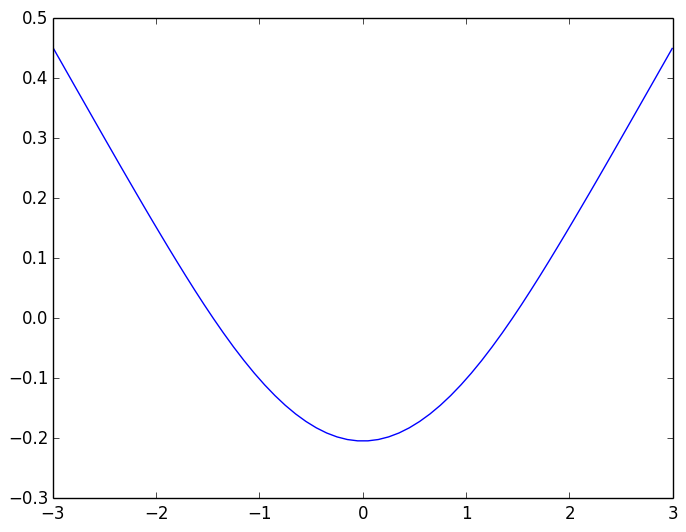

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x317d6b550>

In [30]:
plot(data[:,3],data[:,4])

### Let's place strips at -3, -2, -1 and 0. Set up 2D problems at these positions. 



In [ ]:
#Strip at y = -3

h_amp = 0.45/c #input is nondimensional
alpha_amp = 5*pi/180 #Root incidence



dtstar = 0.015*0.2*2/(k*h_amp) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(u)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)


In [ ]:
nsteps

In [ ]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

In [ ]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T


In [ ]:
plot(tbyT,mat[range,5])


In [ ]:
##Store these values so we can get back to it later

mat1, surf1, curfield1 = mat, surf, curfield


In [ ]:
# Second strip 

#Strip at y = -2

h_amp = (0.1638 + 0.1407)/(2*c) #m #Roughly calculated from file
alpha_amp = 5*pi/180 # built incidence


dtstar = 0.015*0.2*2/(k*h_amp) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(u)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)





In [ ]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

In [ ]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T

In [ ]:
plot(tbyT,mat[range,6])

In [ ]:
##Store these values so we can get back to it later

mat2, surf2, curfield2 = mat, surf, curfield

In [ ]:
# Third strip 

#Strip at y = -1

h_amp = (-0.0912 - 0.1107)/(2*c) #m #Roughly calculated from file
alpha_amp = 5*pi/180 #Since we are using the airfoil file, no need to consider built incidence?

dtstar = 0.015*0.2*2/(k*abs(h_amp)) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(u)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)

In [ ]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

In [ ]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T

In [ ]:
plot(tbyT,mat[range,6])

In [ ]:
##Store these values so we can get back to it later

mat3, surf3, curfield3 = mat, surf, curfield

In [ ]:
# Second strip 

#Strip at y = 0

h_amp = -0.2040/c #m #Roughly calculated from file
alpha_amp = 5*pi/180 #Since we are using the airfoil file, no need to consider built incidence?


dtstar = 0.015*0.2*2/(k*abs(h_amp)) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(u)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)






In [ ]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

In [ ]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T

In [ ]:
plot(tbyT,mat[range,6])

In [ ]:
##Store these values so we can get back to it later

mat4, surf4, curfield4 = mat, surf, curfield

## Let's try and gather the results

In [ ]:
#Using nondimensional quantities here
time = [0:0.001:t_tot;]
cl1_spl = Spline1D(mat1[:,1],mat1[:,6])
cl2_spl = Spline1D(mat2[:,1],mat2[:,6])
cl3_spl = Spline1D(mat3[:,1],mat3[:,6])
cl4_spl = Spline1D(mat4[:,1],mat4[:,6])

cm1_spl = Spline1D(mat1[:,1],mat1[:,8])
cm2_spl = Spline1D(mat2[:,1],mat2[:,8])
cm3_spl = Spline1D(mat3[:,1],mat3[:,8])
cm4_spl = Spline1D(mat4[:,1],mat4[:,8])

cd1_spl = Spline1D(mat1[:,1],mat1[:,7])
cd2_spl = Spline1D(mat2[:,1],mat2[:,7])
cd3_spl = Spline1D(mat3[:,1],mat3[:,7])
cd4_spl = Spline1D(mat4[:,1],mat4[:,7])

cl1 = evaluate(cl1_spl,time)
cl2 = evaluate(cl2_spl,time)
cl3 = evaluate(cl3_spl,time)
cl4 = evaluate(cl4_spl,time)

cm1 = evaluate(cm1_spl,time)
cm2 = evaluate(cm2_spl,time)
cm3 = evaluate(cm3_spl,time)
cm4 = evaluate(cm4_spl,time)

cd1 = evaluate(cd1_spl,time)
cd2 = evaluate(cd2_spl,time)
cd3 = evaluate(cd3_spl,time)
cd4 = evaluate(cd4_spl,time)

range = round(Int,(ncyc-1)*length(time)/ncyc)+1:length(time)
tbyT = (time[range]-time[range[1]])/(T)



In [ ]:
#Now consider that there are 6 strips
# at strip 1 and 6 , cl = 0.5*(cl1+cl2)
dy = 1
cl_tot = (cl1 + cl2 + cl2 + cl3 + cl3 + cl4)*dy*c/b

#plot(tbyT,cl1[range])
#plot(tbyT,cl2[range])
#plot(tbyT,cl3[range])
#plot(tbyT,cl4[range])
#plot(tbyT,cl_tot[range])


#cm_tot = (cm1 + cm2 + cm2 + cm3 + cm3 + cm4)*dy*c/b
#plot(tbyT,cm_tot[range])

cd_tot = (cd1 + cd2 + cd2 + cd3 + cd3 + cd4)*dy*c/b
plot(tbyT,cd_tot[range])





In [ ]:
### Visualise the 3D problem
fig = figure()
ax = gca(projection="3d")

plot3D(map(q->q.x, surf1.bv),map(q->q.z,surf1.bv),-3,"y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf2.bv),map(q->q.z,surf2.bv),-2,"y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf3.bv),map(q->q.z,surf3.bv),-1,"y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf4.bv),map(q->q.z,surf4.bv),0, "y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf1.bv),map(q->q.z,surf1.bv),3, "y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf2.bv),map(q->q.z,surf2.bv),2, "y",color = "black",linewidth=2.0)
plot3D(map(q->q.x, surf3.bv),map(q->q.z,surf3.bv),1, "y",color = "black",linewidth=2.0)


scatter3D(map(q->q.x, curfield1.tev),map(q->q.z,curfield1.tev),-3,"z",s=20,c=map(q->q.s,curfield1.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield2.tev),map(q->q.z,curfield2.tev),-2,"z",s=20,c=map(q->q.s,curfield2.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield3.tev),map(q->q.z,curfield3.tev),-1,"z",s=20,c=map(q->q.s,curfield3.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield4.tev),map(q->q.z,curfield4.tev),0,"z",s=20,c=map(q->q.s,curfield4.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield1.tev),map(q->q.z,curfield1.tev),3,"z",s=20,c=map(q->q.s,curfield1.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield2.tev),map(q->q.z,curfield2.tev),2,"z",s=20,c=map(q->q.s,curfield2.tev),cmap=ColorMap("jet"),edgecolors="none")
scatter3D(map(q->q.x, curfield3.tev),map(q->q.z,curfield3.tev),1,"z",s=20,c=map(q->q.s,curfield3.tev),cmap=ColorMap("jet"),edgecolors="none")






#axis("equal")
#ax[:view_init](20, 120)




# Now we atttempt the same problem with a basic LLT correction - circulation goes to zero at the wingtips 


In [59]:
#Construct dimensionless quantities from given values
c_d = 0.2
b_d = 6
AR = b_d/c_d

u_d = 10
f_d = 0.8889
k = 2*pi*f_d*c_d/(2*u_d)

#_dAll values below are nondimensional
c = 1
u = 1
w = 2*k
T = (2*pi/w)
ncyc = 8
t_tot = ncyc*T 

modedata = readdlm("../test/anto_mode1.dat");
mode_spl = Spline1D(modedata[:,3],modedata[:,4])

n_span = 12
n_bterm = 40

psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end

scale = 0.02

#Run LDVM at all these locations:
alpha_amp = 5*pi/180

h_amp = zeros(n_span)
for i = 1:n_span   
    y_d = -b_d*cos(psi[i])/2.
    h_amp[i] = evaluate(mode_spl,y_d)*scale/c_d
end

dtstar = min(0.015*8,0.015*0.2*2/(k*maximum(h_amp)))
nsteps =round(Int,t_tot/dtstar)+1

alphadef = ConstDef(alpha_amp)
udef = ConstDef(u)
pvt = 0.0 #Doesnt matter, no pitch
lespcrit = [21;] #high value to turn off LEV shedding


W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]





0-element Array{UNSflow.TwoDFlowField,1}

In [60]:
nsteps

3751

In [61]:
for i = 1:Int(n_span/2) #Since problem is symmetric
    hdef = CosDef(0., h_amp[i], w, 0.)
    full_kinem = KinemDef(alphadef, hdef, udef)
    surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)
    curfield = TwoDFlowField()
    del = DelVortDef(1, 500, 10)

    mt, st, ct = ldvm(surf, curfield, nsteps, dtstar)
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end




#Mirror image for the rest of the span
for i = Int(n_span/2)+1:n_span
    mt = W_mat[n_span - i + 1]
    st = W_surf[n_span - i + 1]
    ct = W_curfield[n_span - i + 1]
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end

In [62]:
dtstar

0.12

In [63]:
lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)
sp_gam = zeros(nsteps,n_span)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)



3751-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [64]:
bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end
        

In [65]:
a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)
gam_other = zeros(nsteps,n_span)

for i = 1:nsteps
    for j = 1:n_span
         sp_gam[i,j] = 0
         for n = 1:n_bterm
             sp_gam[i,j] = sp_gam[i,j] + 2*b_d*u*b_coeff[i,n]*sin(n*psi[j])
         end
    end  
end

for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
        gam_other[i,j] = u*c_d*pi*(W_mat[j][i,9] + a03d[i,j])
    end
end



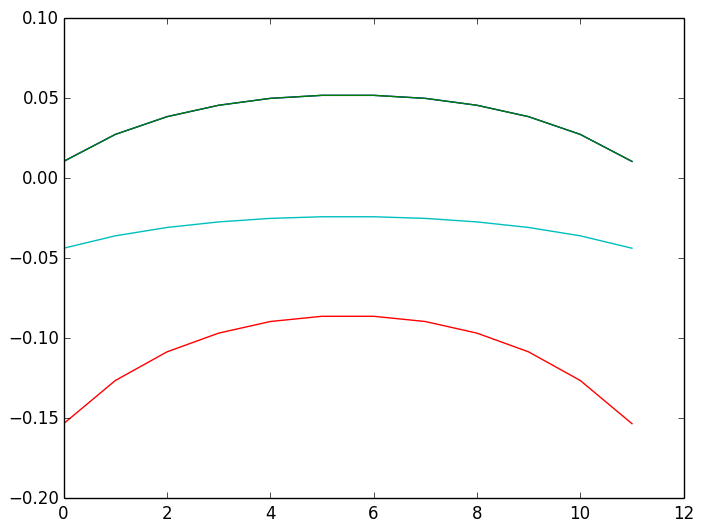

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x317f3c110>

In [66]:
plot(sp_gam[10,1:n_span])
plot(gam_other[10,:])
plot(a03d[10,:])
plot(a0dot3d[10,:])

In [67]:
W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_u[:,:] = 1
W_alpha[:,:] = 5*pi/180
for i = 1:nsteps
    for j = 1:n_span
        hdef = CosDef(0., h_amp[j], w, 0.)
        tt = W_mat[1][i,1]    
        W_h[i,j] = hdef(tt)*c
        W_hdot[i,j] = ForwardDiff.derivative(hdef,tt)*u
    end
end


In [68]:
W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] + (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[1,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end


#cn_w = 

#sum_bcoeff = 0
#    for n = 1:n_bterm
#        if rem(n,2) != 0
#            sum_bcoeff = sum_bcoeff + b_coeff[n]
#        end
#    end

#    cnc_f[i] = -2*pi*(u[i]*cos(alpha[i])/surf.uref + hdot[i]*sin(alpha[i])/surf.uref)*(sum_bcoeff)
#    sum_bdot = 0
#        for n = 1:n_bterm
#            if rem(n,2) != 0
#                sum_bdot = sum_bdot + bdot[n]
#            end
#        end
#        cnnc_f[i] = -(2*pi*surf.c/(surf.uref))*(3*sum_bdot/4)
#    end

In [69]:
using PyPlot

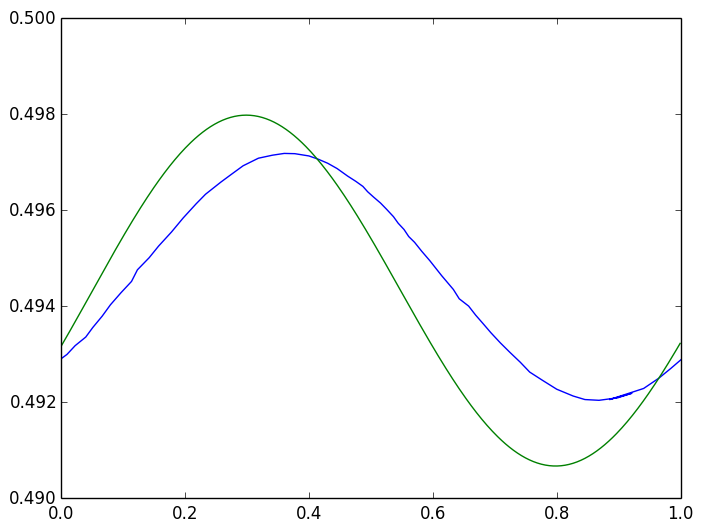

4-element Array{Float64,1}:
 0.0 
 1.0 
 0.49
 0.5 

In [92]:
Tn = T*c_d/u_d
dlt = readcsv("../test/anto_cl.csv")
plot(dlt[:,1]/Tn,dlt[:,2])
t_th = W_mat[1][:,1]*c_d/u_d
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (t_th[range]-t_th[range[1]])/Tn
plot(tbyT,W_cl[range]+0.17)



#plot(W_mat[1][:,1]*c_d/u_d,W_cl)
PyPlot.axis([0,1,0.49,0.5])

In [71]:
plot(W_mat[1][:,1]*c_d/u_d,cl)
#PyPlot.axis([0,120,0,1])

LoadError: LoadError: UndefVarError: cl not defined
while loading In[71], in expression starting on line 1